In [3]:
import pandas as pd
dt=pd.read_csv('diabetes (4).csv')
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dt.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

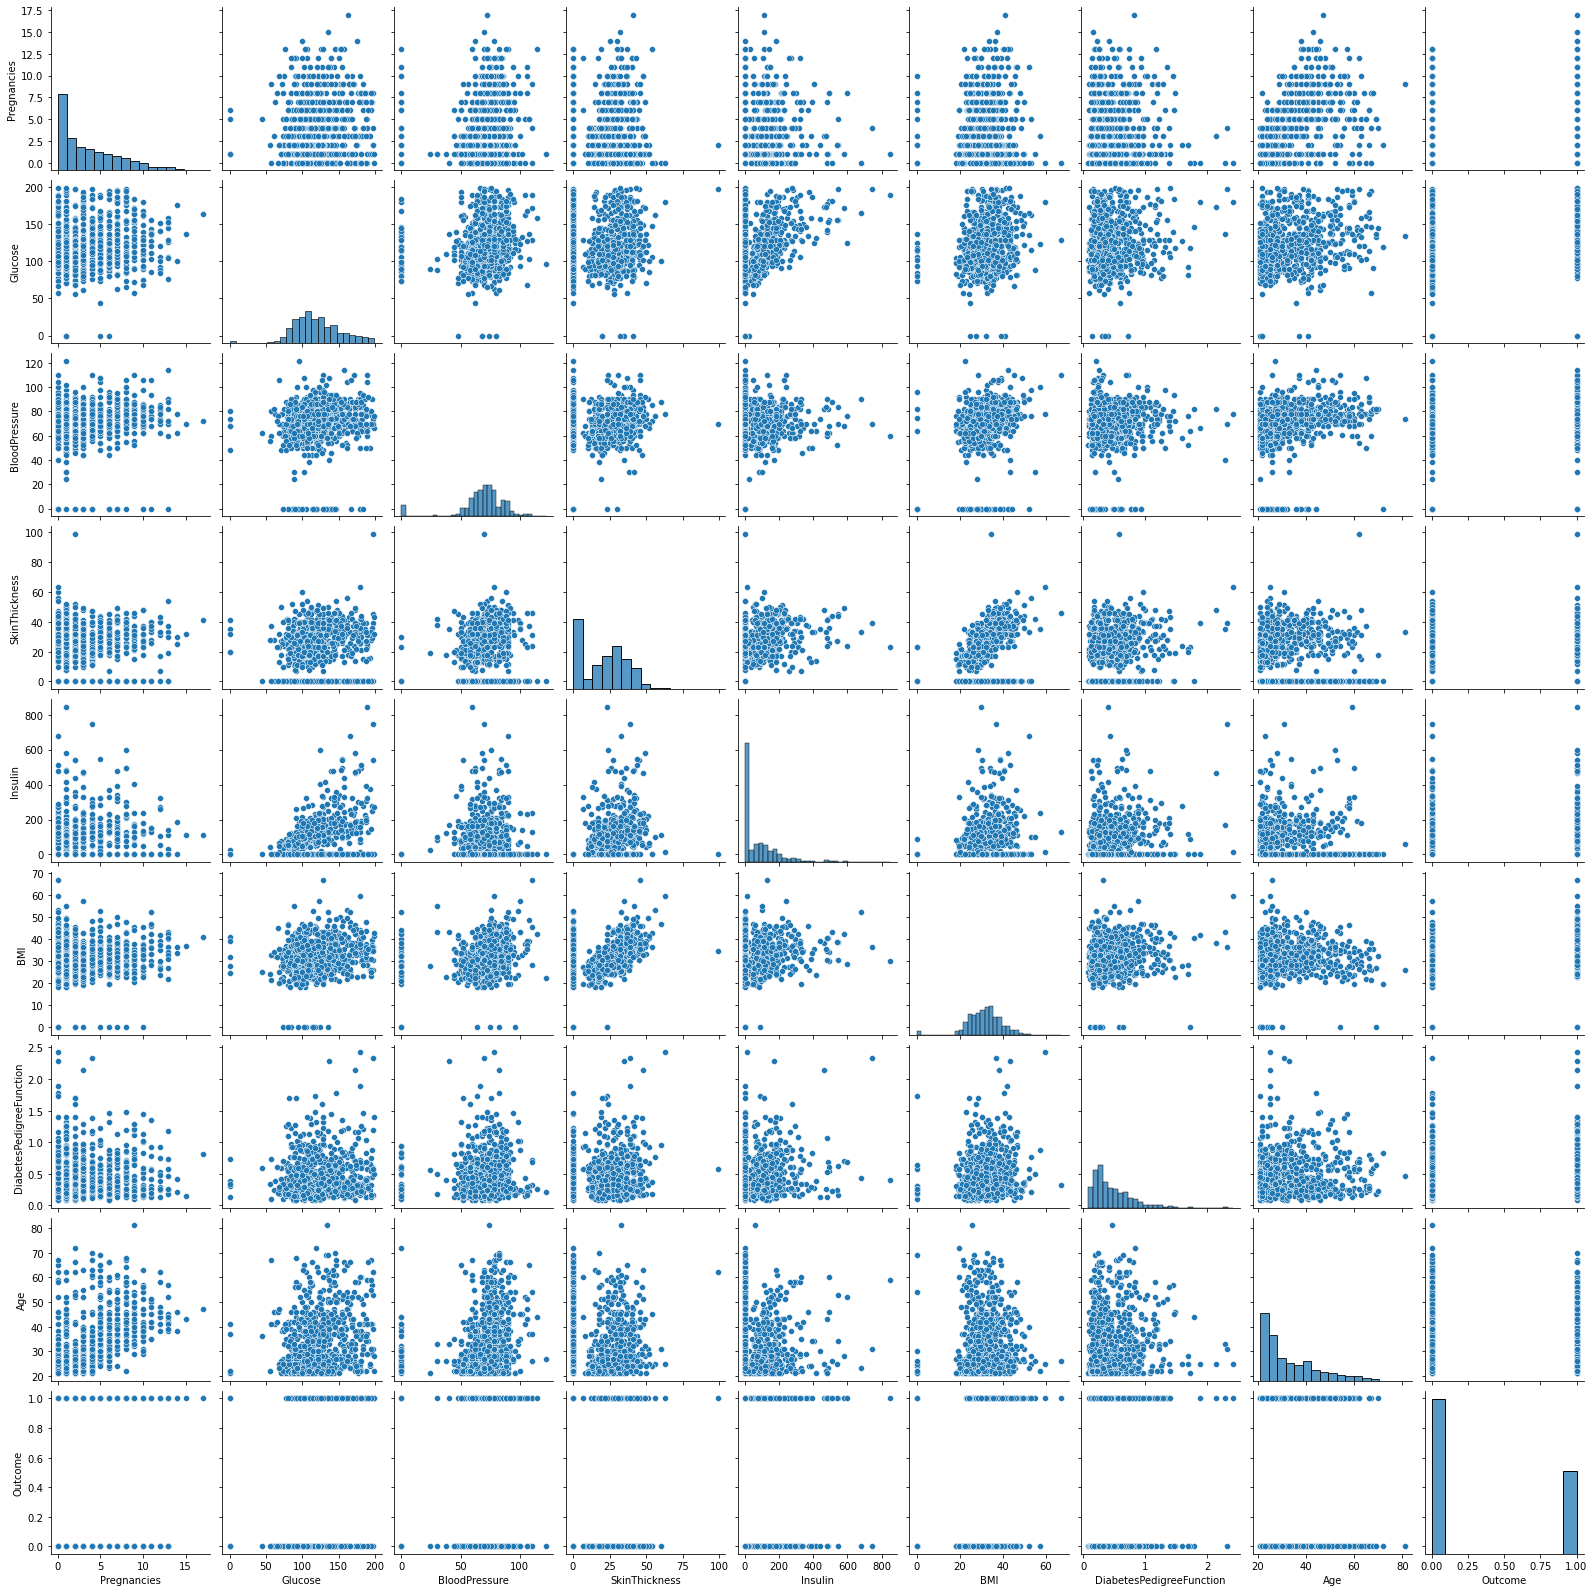

In [6]:
import seaborn as sns
sns.pairplot(dt)

In [7]:
dt=pd.get_dummies(dt,drop_first=True)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import shap
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
X=dt.drop(columns=['Outcome'])
y=dt['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train.apply(pd.to_numeric,errors='coerce')
X_test=X_test.apply(pd.to_numeric,errors='coerce')
X_train.fillna(X_train.mean(),inplace=True)
X_test.fillna(X_test.mean(),inplace=True)
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
explainer=lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['Positivr','Negative'],
    mode='classification',
    feature_selection='auto'
)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


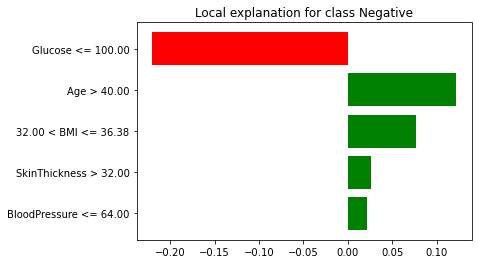

In [15]:
instance=X_test.iloc[0].values
exp=explainer.explain_instance(instance,clf.predict_proba,num_features=5)
exp.show_in_notebook()
fig=exp.as_pyplot_figure()
plt.show()

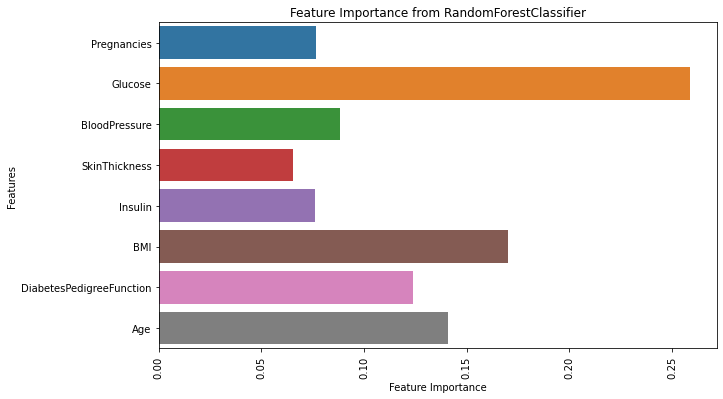

In [16]:
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from RandomForestClassifier")
plt.xticks(rotation=90)
plt.show()

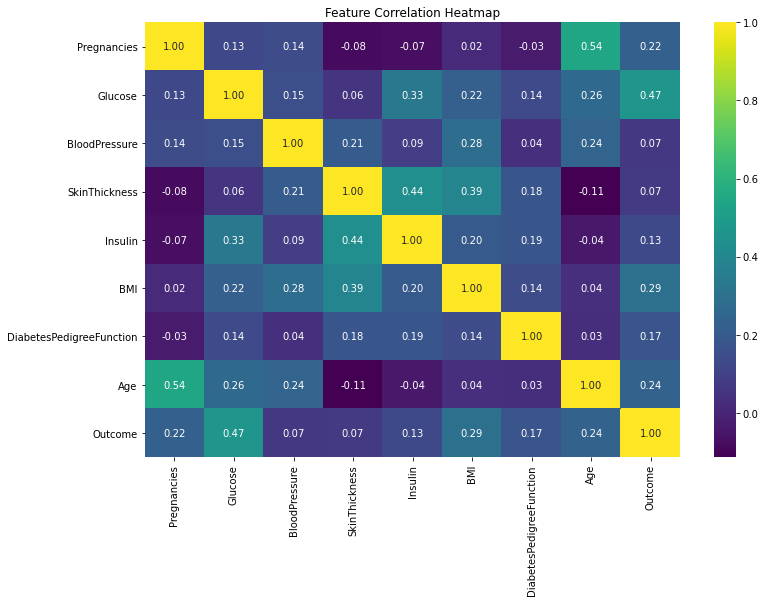

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(dt.corr(), annot=True, cmap="viridis", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

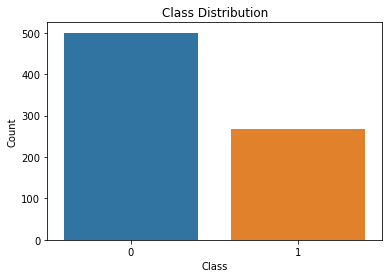

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

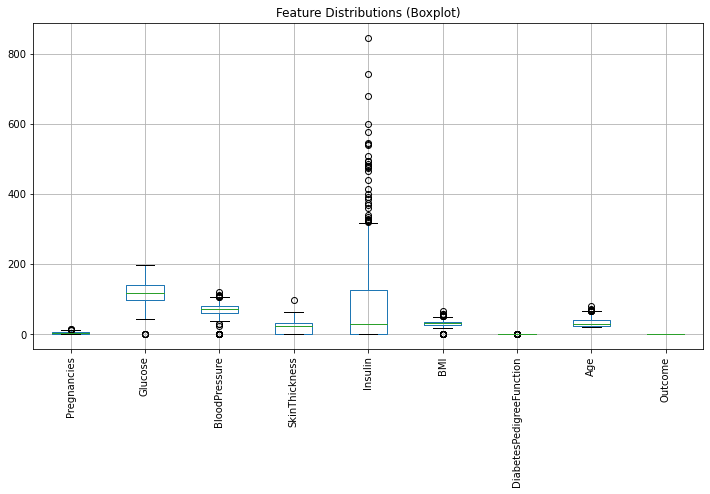

In [19]:
nc=dt.select_dtypes(include=[np.number]).columns
dt[nc]=dt[nc].fillna(dt[nc].mean())
plt.figure(figsize=(12,6))
dt[nc].boxplot(rot=90)
plt.title("Feature Distributions (Boxplot)")
plt.show()